In [17]:
import pandas as pd
import numpy as np
import statistics
import category_encoders as ce

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('data/new-site.csv', sep='\t')

In [7]:
data.head()

,site,dwell-time
0,0,2
1,1,48
2,0,15
3,1,16
4,0,38


In [13]:
data.groupby('site')['dwell-time'].mean().round()

site
0    91.0
1    88.0
Name: dwell-time, dtype: float64

In [10]:
data[data['site'] == 1]['dwell-time']

site            114
dwell-time    10032
dtype: int64

In [11]:
data['dwell-time'].sum()

26930

In [14]:
data_a = data[data['site'] == 0]
data_a

,site,dwell-time
0,0,2
2,0,15
4,0,38
6,0,571
8,0,233
...,...,...
294,0,39
295,0,22
296,0,7
298,0,89


In [15]:
data_b = data[data['site'] == 1]
data_b

,site,dwell-time
1,1,48
3,1,16
5,1,169
7,1,38
10,1,336
...,...,...
281,1,187
282,1,11
283,1,70
291,1,100


In [19]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.1 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(data_a['dwell-time'])
shapiro_result_b = shapiro(data_b['dwell-time'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value группы А 0.0
p-value группы B 0.0
Отвергаем нулевую гипотезу. Распределения в обеих группах нормальные
Альтернативная гипотеза. H1: Распределение в одной или обеих группах отлично от нормального


<AxesSubplot:xlabel='dwell-time', ylabel='Count'>

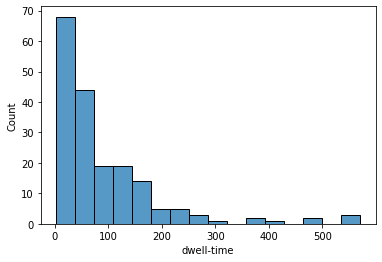

In [20]:
sns.histplot(data_a['dwell-time'])

<AxesSubplot:xlabel='dwell-time', ylabel='Count'>

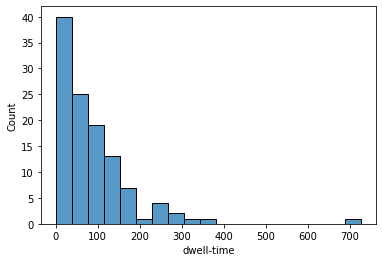

In [21]:
sns.histplot(data_b['dwell-time'])

In [34]:
from scipy.stats import ttest_ind, shapiro, f_oneway, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

In [33]:
# Применим T-тест для сравнения средних

from scipy.stats import ttest_ind
# нулевая и альтернативная гипотезы
H0 = 'Среднее время в группах одинаково'
H1 = 'Среднее время в группе А меньше, чем в группе B'
alpha = 0.05 #уровень значимости
#вычисляем результат T-теста для выборок
results = ttest_ind(
    a=data_a['dwell-time'],
    b=data_b['dwell-time'], 
    alternative='greater'
)
print('p-value:', round(results.pvalue, 2))
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value: 0.41
Принимаем нулевую гипотезу. Среднее время в группах одинаково


In [35]:
from scipy.stats import mannwhitneyu

# нулевая и альтернативная гипотезы
H0 = 'Ежедневный средний чек в группе А равен ежедневному среднему чеку в группе B'
H1 = 'Ежедневный средний чек в группе А большк, чем в группе B'
alpha = 0.1 # уровень значимости

#вычисляем результат критерия Манна-Уитни для выборок
results = mannwhitneyu(
    x=data_a['dwell-time'],
    y=data_b['dwell-time'], 
    alternative='greater'
)
print('p-value:', round(results.pvalue, 2))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value: 0.55
Принимаем нулевую гипотезу. Ежедневный средний чек в группе А равен ежедневному среднему чеку в группе B
